# Before you start :
   - These exercises are related to the Subsetting and Descriptive Stats lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

# Challenge 1

#### In this challenge we will use the `Temp_States.csv` file. 

#### First import it into a data frame called `temp`.

In [2]:
temp=pd.read_csv("Temp_States.csv")

#### Print `temp`

In [3]:
temp.head()

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333
3,Hartford,Connecticut,17.222222
4,Bridgeport,Connecticut,14.444444


#### Explore the data types of the Temp dataframe. What type of data do we have? Comment your result.

In [4]:
temp.dtypes


City            object
State           object
Temperature    float64
dtype: object

#### Select the rows where state is New York

In [5]:
filtered=temp[temp.State=="New York"]
filtered.head()

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333


#### What is the average of the temperature of cities in New York?

In [6]:
filtered.Temperature.mean()


10.74074074074074

#### We want to know cities and states with Temperature above 15 degress Celcius

In [7]:
filtered=temp[temp.Temperature>15]
filtered.head()

,City,State,Temperature
0,NYC,New York,19.444444
3,Hartford,Connecticut,17.222222
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Now, return only the cities that have a temperature above 15 degress Celcius

In [8]:
filtered.City

0         NYC
3    Hartford
5      Treton
6      Newark
Name: City, dtype: object

#### We want to know which cities have a temperature above 15 degrees Celcius and below 20 degrees Celcius

*Hint: First write the condition then select the rows.*

In [9]:
filtered=temp[(temp.Temperature<20)&(temp.Temperature>15)]
filtered.City


0         NYC
3    Hartford
Name: City, dtype: object

#### Find the mean and the standard deviation of the temperature of each state.

*Hint: Use functions from Data Manipulation lesson*

In [10]:
filtered=temp.groupby("State",as_index=False).agg({"Temperature":["mean","std"]})
filtered

State Temperature          
                      mean       std
0  Connecticut   15.833333  1.964186
1   New Jersey   21.111111  1.571348
2     New York   10.740741  8.133404

In [11]:
filtered.columns

MultiIndex(levels=[['Temperature', 'State'], ['mean', 'std', '']],
           codes=[[1, 0, 0], [2, 0, 1]])

In [12]:
filtered.loc[:,("Temperature","mean")]

0    15.833333
1    21.111111
2    10.740741
Name: (Temperature, mean), dtype: float64

In [13]:
filtered.iloc[:,1]

0    15.833333
1    21.111111
2    10.740741
Name: (Temperature, mean), dtype: float64

# Challenge 2

#### Load the `employee.csv` file into a DataFrame. Call the dataframe `employee`

In [14]:
employee=pd.read_csv("Employee.csv")

#### Explore the data types of the Temp dataframe. Comment your results

In [15]:
employee.dtypes

Name          object
Department    object
Education     object
Gender        object
Title         object
Years          int64
Salary         int64
dtype: object

In [16]:
employee

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


#### Show visually the frequency distribution (histogram) of the employee dataset. In few words describe these histograms?

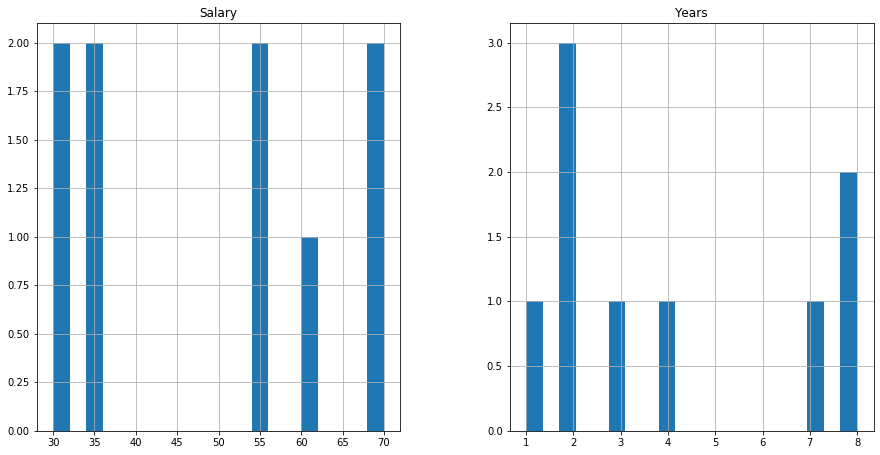

In [17]:
plt.rcParams["figure.figsize"] = (15,7.5)
employee.hist(bins=20);

#### What's the average salary in this company?

In [18]:
employee.Salary.mean()

48.888888888888886

#### What's the highest salary?

In [19]:
employee.Salary.max()

70

#### What's the lowest salary?

In [20]:
employee.Salary.min()

30

#### Who are the employees with the lowest salary?

In [21]:
employee[employee.Salary==employee.Salary.min()]

,Name,Department,Education,Gender,Title,Years,Salary
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Could you give all the information about an employee called David?

In [22]:
employee[employee.Name=="David"]

,Name,Department,Education,Gender,Title,Years,Salary
2,David,HR,Master,M,analyst,2,30


#### Could you give only David's salary?

In [23]:
employee[employee.Name=="David"]["Salary"]


2    30
Name: Salary, dtype: int64

#### Print all the rows where job title is associate

In [24]:
employee[employee.Title=="associate"]

,Name,Department,Education,Gender,Title,Years,Salary
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
7,Pedro,IT,Phd,M,associate,7,60


#### Print the first 3 rows of your dataframe

##### Tip : There are 2 ways to do it. Do it both ways

In [25]:
employee[0:3]

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


In [26]:
employee.iloc[0:3,:]

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Find the employees who's title is associate and the salary above 55?

In [27]:
employee[(employee.Title=="associate")&(employee.Salary>55)]

,Name,Department,Education,Gender,Title,Years,Salary
7,Pedro,IT,Phd,M,associate,7,60


#### Group the employees based on their number of years of employment. What are the average salaries in each group?

In [28]:
filtered=employee.groupby("Years",as_index=False).agg({"Salary":"mean"})
filtered

,Years,Salary
0,1,35.000000
1,2,38.333333
2,3,55.000000
3,4,35.000000
4,7,60.000000
5,8,70.000000


####  What is the average Salary per title?

In [29]:
filtered=employee.groupby("Title",as_index=False).agg({"Salary":"mean"})
filtered

,Title,Salary
0,VP,70.000000
1,analyst,32.500000
2,associate,56.666667


#### Show a visual summary of the data using boxplot. What Are the First and Third Quartiles? Comment your results.
##### * Hint : Quantiles vs Quartiles*
##### - `In Probability and Statistics, quantiles are cut points dividing the range of a probability distribution into continuous intervals with equal probabilities. When division is into four parts the values of the variate corresponding to 25%, 50% and 75% of the total distribution are called quartiles.`

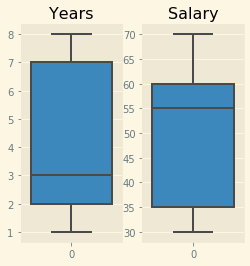

In [30]:
plt.style.use('Solarize_Light2')
plt.rcParams["figure.figsize"] = (4,4)
f,axes = plt.subplots(1,2)
sbn.boxplot(data=employee.Years,  orient='v' , ax=axes[0])
axes[0].set_title("Years")
sbn.boxplot(data=employee.Salary,  orient='v' , ax=axes[1])
axes[1].set_title("Salary")
plt.show();

In [31]:
employee.quantile(0.25)

Years      2.0
Salary    35.0
Name: 0.25, dtype: float64

In [32]:
employee.quantile(0.75)

Years      7.0
Salary    60.0
Name: 0.75, dtype: float64

#### Is the mean salary per gender different?

In [33]:
filtered=employee.groupby("Gender",as_index=False).agg({"Salary":"mean"})
filtered.rename(columns={"Salary":"Mean"},inplace=True)
filtered

,Gender,Mean
0,F,47.5
1,M,50.0


#### Find the minimum, mean and the maximum of all numeric columns for each Department.

##### Hint: Use functions from Data Manipulation lesson

In [34]:
filtered=employee.groupby("Department",as_index=False).agg({"Salary":["mean","min","max"]})
filtered

Department Salary        
               mean min max
0         HR  45.00  30  70
1         IT  48.75  30  70
2      Sales  55.00  55  55

### Bonus Question

#### For each department, compute the difference between the maximal salary and the minimal salary.

##### * Hint: try using `agg` or `apply` and `lambda`*

In [35]:
filtered=employee.groupby("Department",as_index=False).agg({"Salary":lambda x:x.max()-x.min()})
filtered=filtered.rename(columns={"Salary":"Difference"})
filtered

,Department,Difference
0,HR,40
1,IT,40
2,Sales,0


# Challenge 3

#### Open the Orders.csv dataset. Name your dataset orders

In [36]:
orders=pd.read_csv("Orders.zip")

#### Explore your dataset by looking at the data types and the summary statistics. Comment your results

In [37]:
orders.head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
0,0,536365,85123A,2010,12,3,8,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,1,536365,71053,2010,12,3,8,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,2,536365,84406B,2010,12,3,8,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,3,536365,84029G,2010,12,3,8,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,4,536365,84029E,2010,12,3,8,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [38]:
orders.dtypes

Unnamed: 0        int64
InvoiceNo         int64
StockCode        object
year              int64
month             int64
day               int64
hour              int64
Description      object
Quantity          int64
InvoiceDate      object
UnitPrice       float64
CustomerID        int64
Country          object
amount_spent    float64
dtype: object

In [39]:
orders.drop("Unnamed: 0",axis=1,inplace=True)

In [40]:
orders.describe().T

,count,mean,std,min,25%,50%,75%,max
InvoiceNo,397924.0,560617.126645,13106.167695,536365.0,549234.00,561893.00,572090.00,581587.00
year,397924.0,2010.934259,0.247829,2010.0,2011.00,2011.00,2011.00,2011.00
month,397924.0,7.612537,3.416527,1.0,5.00,8.00,11.00,12.00
day,397924.0,3.614555,1.928274,1.0,2.00,3.00,5.00,7.00
hour,397924.0,12.728247,2.273535,6.0,11.00,13.00,14.00,20.00
Quantity,397924.0,13.021823,180.420210,1.0,2.00,6.00,12.00,80995.00
UnitPrice,397924.0,3.116174,22.096788,0.0,1.25,1.95,3.75,8142.75
CustomerID,397924.0,15294.315171,1713.169877,12346.0,13969.00,15159.00,16795.00,18287.00
amount_spent,397924.0,22.394749,309.055588,0.0,4.68,11.80,19.80,168469.60


In [41]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397924 entries, 0 to 397923
Data columns (total 13 columns):
InvoiceNo       397924 non-null int64
StockCode       397924 non-null object
year            397924 non-null int64
month           397924 non-null int64
day             397924 non-null int64
hour            397924 non-null int64
Description     397924 non-null object
Quantity        397924 non-null int64
InvoiceDate     397924 non-null object
UnitPrice       397924 non-null float64
CustomerID      397924 non-null int64
Country         397924 non-null object
amount_spent    397924 non-null float64
dtypes: float64(2), int64(7), object(4)
memory usage: 39.5+ MB


In [42]:
# No se encontraron nulos, traía un índice que no era útil y se realizó drop(), se recomienda realizar análisis de atípicos para identificarlos puntualmente

####  What is the average Purchase Price?

In [43]:
orders["UnitPrice"].mean()

3.116174480549152

#### What were the highest and lowest purchase prices? 

In [44]:
orders["UnitPrice"].max()

8142.75

In [45]:
orders["UnitPrice"].min()

0.0

#### Select all the customers we have in Spain

In [46]:
filtered=orders[orders["Country"]=="Spain"]["CustomerID"].unique()
filtered

array([12557, 17097, 12540, 12551, 12484, 12539, 12510, 12421, 12502,
       12462, 12507, 12541, 12547, 12597, 12545, 12596, 12354, 12417,
       12455, 12450, 12548, 12556, 12550, 12546, 12454, 12448, 12544,
       12538, 12445, 12442], dtype=int64)

#### How many customers do we have in Spain?
##### Hint : Use value_counts()

In [47]:
len(filtered)

30

#### Select all the customers who have bought more than 50 items ?

In [81]:
filtered=orders.groupby("CustomerID",as_index=False).agg({"Quantity":"sum"})
filtered[filtered["Quantity"]>50].sort_values(by="Quantity",ascending=False).head()

,CustomerID,Quantity
1690,14646,197491
3009,16446,80997
1880,14911,80515
55,12415,77670
0,12346,74215


#### Select orders from Spain that are above 50 items

In [99]:
filtered=orders[orders["Country"]=="Spain"].groupby("InvoiceNo",as_index=False).agg({"Quantity":"sum"})
filtered.head()

,InvoiceNo,Quantity
0,536944,400
1,538095,67
2,538525,300
3,539351,100
4,540469,630


#### Select all free orders

In [56]:
filtered=orders.groupby("InvoiceNo",as_index=False).agg({"amount_spent":"sum"})
filtered[filtered.amount_spent==0].head()

,InvoiceNo,amount_spent
2721,543599,0.0
11301,564651,0.0
12848,568384,0.0
17360,578841,0.0


#### Select all orders that are 'lunch bag'
#### Hint: Use string functions

In [108]:
filtered=orders[orders["Description"].str.contains("lunch bag")]
filtered["InvoiceNo"].unique()

array([536378, 536385, 536401, ..., 581538, 581581, 581583])

#### Select all orders that are made in 2011 and are 'lunch bag'  

In [110]:
filtered=orders[(orders["Description"].str.contains("lunch bag"))&(orders["year"]==2011)]
filtered["InvoiceNo"].unique()

array([540015, 540023, 540098, ..., 581538, 581581, 581583])

#### Show the frequency distribution of the amount spent in Spain.

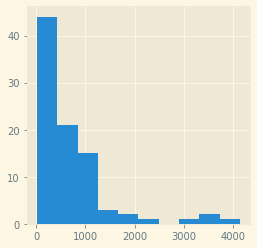

In [119]:
filtered=orders[orders["Country"]=="Spain"]
filtered=filtered.groupby("InvoiceNo",as_index=False).agg({"amount_spent":"sum"})
filtered["amount_spent"].hist()

#### Select all orders made in the month of August

In [62]:
filtered=orders[(orders["month"]==8)]
filtered["InvoiceNo"].unique()

array([561904, 561905, 561906, ..., 565014, 565056, 565067], dtype=int64)

#### Select how many orders are made by countries in the month of August
##### Hint: Use value_counts()

In [94]:
filtered=orders[orders['month']==8].groupby("Country",as_index=False).agg({"InvoiceNo":"unique"})
filtered['InvoiceNo']=filtered['InvoiceNo'].apply(len)
filtered.columns=['Country','Orders']
filtered.head()

,Country,Orders
0,Australia,2
1,Austria,2
2,Belgium,9
3,Canada,1
4,Channel Islands,5


#### What's the  average amount of money spent by country

In [67]:
filtered=orders.groupby("Country",as_index=False).agg({"amount_spent":"mean"})
filtered

,Country,amount_spent
0,Australia,116.895620
1,Austria,25.624824
2,Bahrain,32.258824
3,Belgium,20.283772
4,Brazil,35.737500
5,Canada,24.280662
6,Channel Islands,27.340160
7,Cyprus,22.134169
8,Czech Republic,33.069600
9,Denmark,49.882474


#### What's the most expensive item?

In [74]:
filtered=orders[orders["UnitPrice"]==orders["UnitPrice"].max()]
filtered["Description"].iloc[0]

'postage'

#### What was the average amount spent per year ?

In [70]:
# Promedio por año
filtered=orders.groupby(["year"],as_index=False).agg({"amount_spent":"mean"})
filtered

,year,amount_spent
0,2010,21.892733
1,2011,22.430074
